# Script To Do Discovery On Loan Types

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


In [2]:
#Load in the merged loan data
loans_base_df = pd.read_csv("./csv_files/loans_merged_all_transactions.csv")

loans_base_df = loans_base_df.replace([np.inf, -np.inf], np.nan)

#Create the target variable
target_raw = loans_base_df['status'].copy()
target_raw[(target_raw == 'A') | (target_raw == 'C')] = 0
target_raw[(target_raw == 'B')  | (target_raw == 'D')] = 1

In [3]:
#Number of loans

num_comp_loans = target_raw.sum()

num_ncomp_loans = loans_base_df.shape[0] - num_comp_loans


# Percentage of bad and good loans
print(num_comp_loans/loans_base_df.shape[0],num_ncomp_loans/loans_base_df.shape[0])


0.11143695014662756 0.8885630498533724


# Seperate Into Presegmented Loan Types A,B,C,D

In [4]:
#Value of Loans

#What is dataset current date.... December 31st, 1998 

A_loans = loans_base_df[loans_base_df['status']=='A']
C_loans = loans_base_df[loans_base_df['status']=='C']

B_loans = loans_base_df[loans_base_df['status']=='B']
D_loans = loans_base_df[loans_base_df['status']=='D']

#date_x is loan date
#date_y is account creation date

#Amount of Loan Paid
Amount_Paid_A = A_loans['k_symbol_UVER_sum']
Amount_Paid_B = B_loans['k_symbol_UVER_sum']
Amount_Paid_C = C_loans['k_symbol_UVER_sum']
Amount_Paid_D = D_loans['k_symbol_UVER_sum']

# Amount to Be Paid
Amount_Rem_A = A_loans['amount'] - A_loans['k_symbol_UVER_sum']
Amount_Rem_B = B_loans['amount'] - B_loans['k_symbol_UVER_sum']
Amount_Rem_C = C_loans['amount'] - C_loans['k_symbol_UVER_sum']
Amount_Rem_D = D_loans['amount'] - D_loans['k_symbol_UVER_sum']

Amount_Paid_Tot = Amount_Paid_A.sum() + Amount_Paid_B.sum() + Amount_Paid_C.sum() + Amount_Paid_D.sum()
Amount_Rem_Tot = Amount_Rem_A.sum() + Amount_Rem_B.sum() + Amount_Rem_C.sum() + Amount_Rem_D.sum()

# Print results 
print('Total: ',Amount_Paid_Tot, Amount_Rem_Tot)

print('A:     ' ,Amount_Paid_A.sum(),Amount_Rem_A.sum())
print('B:      ' ,Amount_Paid_B.sum(),Amount_Rem_B.sum())
print('C:     ' ,Amount_Paid_C.sum(),Amount_Rem_C.sum())
print('D:      ' ,Amount_Paid_D.sum(),Amount_Rem_D.sum())

Total:  55253001 48008739
A:      18602306 910
B:       3350530 1011818
C:      28891760 40186612
D:       4408405 6809399


In [5]:
# Find amount paid and amount remaining

#Type A
#Amount paid = amount
#Amount remaining = 0

#Type C
#Amount paid = Months passed since start * payments
#Amount remaining = Amount - Amount paid

#B' stands for contract finished, loan not payed,


#D' stands for running contract, client in debt
Amount_Rem_B.sum()
loans_base_df.head()

,loan_id,account_id,date_x,amount,duration,payments,status,district_id,frequency,date_y,amount_order,k_symbol_LEASING,k_symbol_Other,k_symbol_POJISTNE,k_symbol_SIPO,k_symbol_UVER,date_min,date_max,amount_sum,amount_mean,amount_std,balance_min,balance_max,balance_mean,balance_std,type_PRIJEM_sum,type_VYBER_sum,type_VYDAJ_sum,operation_Other_sum,operation_PREVOD NA UCET_sum,operation_PREVOD Z UCTU_sum,operation_VKLAD_sum,operation_VYBER_sum,operation_VYBER KARTOU_sum,k_symbol_DUCHOD_sum,k_symbol_Other_sum,k_symbol_POJISTNE_sum,k_symbol_SANKC. UROK_sum,k_symbol_SIPO_sum,k_symbol_SLUZBY_sum,k_symbol_UROK_sum,k_symbol_UVER_sum,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,type_x,gender,birth_date,type_y,issued
0,4959,2,1994-01-05,80952,24,3373.0,A,1,POPLATEK MESICNE,1993-02-26,10638.7,0.0,0.0,0.0,7266.0,3372.7,1993-02-26,1998-12-31,3151514,6593.125523,7694.515237,1100,69302,36540.780335,11028.155962,1597055,217442,1337017,10719,553242,1537936,48400,1001217,0,0,2586578,0,0,472290,975,10719,80952,1204953,0,0,0,1,1,100.0,12541,0.2,0.43,167,85677.0,99107,OWNER,M,1945-02-04,No Card,NaN
1,4961,19,1996-04-29,30276,12,2523.0,B,21,POPLATEK MESICNE,1995-04-07,2523.2,0.0,0.0,0.0,0.0,2523.2,1995-04-07,1998-12-31,1575532,5199.775578,6866.583331,-10605,58158,16253.069307,12127.947343,793196,32194,750142,5589,20184,741807,45800,762152,0,0,1068101,0,58,481000,600,5589,20184,103347,87,16,7,1,7,67.0,9104,1.5,2.07,123,2299.0,2354,OWNER,F,1939-04-23,No Card,NaN
2,4962,25,1997-12-08,30276,12,2523.0,A,68,POPLATEK MESICNE,1996-07-28,10614.2,0.0,1110.0,164.0,6817.0,2523.2,1996-07-28,1998-12-31,2958556,10797.649635,15178.207418,900,134210,56279.237226,24090.944026,1494375,85758,1378423,6203,248733,0,1488172,1215448,0,0,2733200,4428,0,184059,390,6203,30276,228848,15,40,18,2,6,57.2,9893,4.0,4.72,96,5623.0,5887,OWNER,M,1962-02-09,No Card,NaN
3,4967,37,1998-10-14,318480,60,5308.0,D,20,POPLATEK MESICNE,1997-08-18,10305.5,0.0,2584.0,97.0,2317.0,5307.5,1997-08-18,1998-12-31,948159,7293.530769,11915.486863,-1011,104762,37547.484615,23823.350618,497029,41655,409475,2535,75280,0,494494,375850,0,0,906325,1358,0,32438,195,2535,5308,70646,94,14,3,1,4,58.4,8547,2.6,3.64,120,1563.0,1542,OWNER,M,1952-08-26,No Card,NaN
4,4968,38,1998-04-19,110736,48,2307.0,C,19,POPLATEK TYDNE,1997-08-08,9666.8,0.0,231.0,228.0,6901.0,2306.8,1997-08-08,1998-12-31,571952,4399.630769,5450.454498,13841,55991,34462.384615,9455.331494,308266,37819,225867,2506,107007,256060,49700,156679,0,0,465082,2736,0,82812,360,2506,18456,51428,50,11,3,1,4,52.7,8402,3.1,3.98,120,999.0,1099,OWNER,F,1940-01-30,No Card,NaN


In [6]:
# Print out an example customer

pd.set_option('display.max_rows',100)
print(loans_base_df.loc[5])

loan_id                                     4973
account_id                                    67
date_x                                1996-05-02
amount                                    165960
duration                                      24
payments                                    6915
status                                         A
district_id                                   16
frequency                       POPLATEK MESICNE
date_y                                1994-10-19
amount_order                               13753
k_symbol_LEASING                               0
k_symbol_Other                               445
k_symbol_POJISTNE                              0
k_symbol_SIPO                               6393
k_symbol_UVER                               6915
date_min                              1994-10-19
date_max                              1998-12-31
amount_sum                               4518183
amount_mean                              11827.7
amount_std          

# Individual Loan Type Dataframes

# A Loans

In [7]:
# Create dataframes for each loan type and calculate percent paid

percent_paid = 100*(A_loans['k_symbol_UVER_sum'] / A_loans['amount'])

A_loans['percent_paid'] = percent_paid
A_info = A_loans[['status','date_x','amount','duration','payments','k_symbol_UVER_sum','percent_paid']]
A_info.head()

/home/dan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,status,date_x,amount,duration,payments,k_symbol_UVER_sum,percent_paid
0,A,1994-01-05,80952,24,3373.0,80952,100.0
2,A,1997-12-08,30276,12,2523.0,30276,100.0
5,A,1996-05-02,165960,24,6915.0,165960,100.0
6,A,1997-08-10,102876,12,8573.0,102876,100.0
10,A,1996-11-06,88440,12,7370.0,88440,100.0


# B Loans

In [8]:
percent_paid = 100*(B_loans['k_symbol_UVER_sum'] / B_loans['amount'])

B_loans['percent_paid'] = percent_paid
B_info = B_loans[['status','date_x','amount','duration','payments','k_symbol_UVER_sum','percent_paid']]
B_info.head()

print( B_info['amount'].sum(), B_info['k_symbol_UVER_sum'].sum(), B_info['k_symbol_UVER_sum'].sum()/B_info['amount'].sum())

4362348 3350530 0.7680565603661148


/home/dan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# C loans

In [9]:
percent_paid = 100*(C_loans['k_symbol_UVER_sum'] / C_loans['amount'])

C_loans['percent_paid'] = percent_paid
C_info = C_loans[['status','date_x','amount','duration','payments','k_symbol_UVER_sum','percent_paid']]
C_info.head()

print( C_info['amount'].sum(), C_info['k_symbol_UVER_sum'].sum(), C_info['k_symbol_UVER_sum'].sum()/C_info['amount'].sum())


69078372 28891760 0.41824610458393546


/home/dan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


 # D Loans

In [10]:
percent_paid = 100*(D_loans['k_symbol_UVER_sum'] / D_loans['amount'])

D_loans['percent_paid'] = percent_paid
D_info = D_loans[['status','date_x','amount','duration','payments','k_symbol_UVER_sum','percent_paid']]
D_info.head()

print( D_info['amount'].sum(), D_info['k_symbol_UVER_sum'].sum(), D_info['k_symbol_UVER_sum'].sum()/D_info['amount'].sum())

11217804 4408405 0.3929828868466591


/home/dan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Do Some Plots

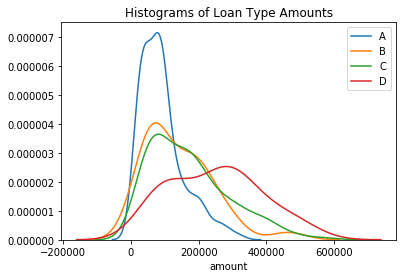

In [11]:
sns.distplot(A_info['amount'], hist=False, rug=False, label="A");
sns.distplot(B_info['amount'], hist=False, rug=False, label="B");
sns.distplot(C_info['amount'], hist=False, rug=False, label="C");
sns.distplot(D_info['amount'], hist=False, rug=False, label="D");
plt.title('Histograms of Loan Type Amounts')
plt.legend();

Text(0.5, 1.0, 'Histograms of Loan Types Durations')

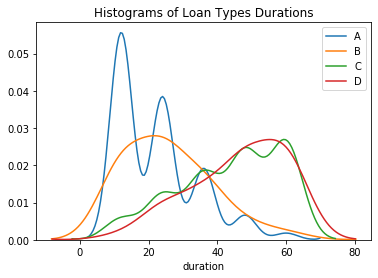

In [12]:
sns.distplot(A_info['duration'], hist=False, rug=False, label="A");
sns.distplot(B_info['duration'], hist=False, rug=False, label="B");
sns.distplot(C_info['duration'], hist=False, rug=False, label="C");
sns.distplot(D_info['duration'], hist=False, rug=False, label="D");
plt.title('Histograms of Loan Types Durations')
#plt.legend(['A','B','C','D']);

Text(0.5, 1.0, 'Histograms of Loan Type Remaining To Be Paid')

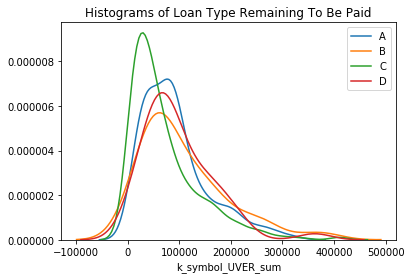

In [13]:
sns.distplot(A_info['k_symbol_UVER_sum'], hist=False, rug=False, label="A");
sns.distplot(B_info['k_symbol_UVER_sum'], hist=False, rug=False, label="B");
sns.distplot(C_info['k_symbol_UVER_sum'], hist=False, rug=False, label="C");
sns.distplot(D_info['k_symbol_UVER_sum'], hist=False, rug=False, label="D");
plt.title('Histograms of Loan Type Remaining To Be Paid')

Text(0.5, 1.0, 'Histograms of Loan Type Payment Sizes')

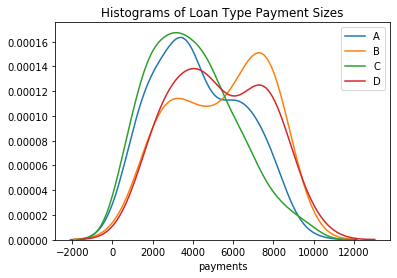

In [14]:
sns.distplot(A_info['payments'], hist=False, rug=False, label="A");
sns.distplot(B_info['payments'], hist=False, rug=False, label="B");
sns.distplot(C_info['payments'], hist=False, rug=False, label="C");
sns.distplot(D_info['payments'], hist=False, rug=False, label="D");
plt.title('Histograms of Loan Type Payment Sizes')

4980

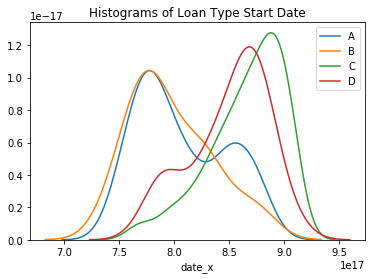

In [15]:
sns.distplot(pd.to_datetime(A_info['date_x']), hist=False, rug=False, label="A");
sns.distplot(pd.to_datetime(B_info['date_x']), hist=False, rug=False, label="B");
sns.distplot(pd.to_datetime(C_info['date_x']), hist=False, rug=False, label="C");
sns.distplot(pd.to_datetime(D_info['date_x']), hist=False, rug=False, label="D");
plt.title('Histograms of Loan Type Start Date')
loans_base_df['amount'].min()


Text(0.5, 1.0, 'Loan Amount Distribution')

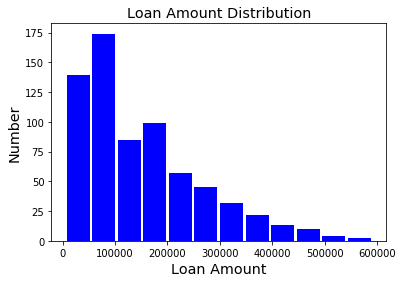

In [16]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)

chart = sns.distplot(loans_base_df['amount'], kde=False, bins=12, rug=False,
                    hist_kws={"histtype": "bar", "linewidth": 3,
                            "alpha": 1, "color": "b", "rwidth" : 0.9 });

ax.set_xlabel('Loan Amount',fontsize='x-large')
ax.set_ylabel('Number',fontsize='x-large')
#ax.set_facecolor('xkcd:salmon')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Loan Amount Distribution',fontsize='x-large')

# Loans Skew Small!

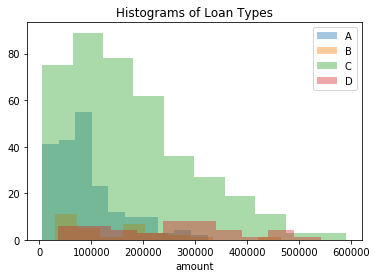

In [17]:
sns.distplot(A_info['amount'], kde=False, bins=10, rug=False, label="A");
sns.distplot(B_info['amount'], kde=False, bins=10, rug=False, label="B");
sns.distplot(C_info['amount'], kde=False, bins=10, rug=False, label="C");
sns.distplot(D_info['amount'], kde=False, bins=10, rug=False, label="D");
plt.title('Histograms of Loan Types')
plt.legend();

In [18]:
loans_base_df['amount'].median()

116928.0

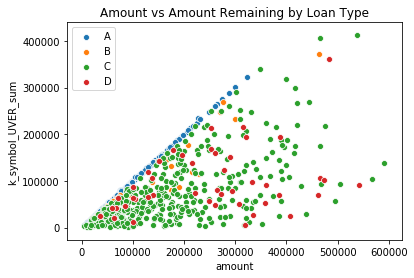

In [19]:
sns.scatterplot('amount','k_symbol_UVER_sum',data=A_info,label="A")
sns.scatterplot('amount','k_symbol_UVER_sum',data=B_info,label="B")
sns.scatterplot('amount','k_symbol_UVER_sum',data=C_info,label="C")
sns.scatterplot('amount','k_symbol_UVER_sum',data=D_info,label="D")

plt.title('Amount vs Amount Remaining by Loan Type')

plt.legend();

In [20]:
loans_base_df[(loans_base_df['amount']>100000) ]['status'].value_counts()

C    260
A     64
D     38
B     15
Name: status, dtype: int64

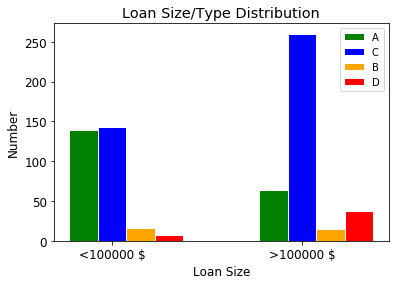

In [21]:
# set width of bar
barWidth = 0.15

fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)
 
# set height of bar
bars1 = [139, 64]
bars2 = [16, 15 ]
bars3 = [143,260 ]
bars4 = [7, 38 ]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3] 
    
# Make the plot
plt.bar(r1, bars1, color='g', width=barWidth, edgecolor='white', label='A')
plt.bar(r2, bars3, color='b', width=barWidth, edgecolor='white', label='C')
plt.bar(r3, bars2, color='orange', width=barWidth, edgecolor='white', label='B')
plt.bar(r4, bars4, color='r', width=barWidth, edgecolor='white', label='D') 
    
# Add xticks on the middle of the group bars
#plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['<100000 $', '>100000 $'],fontsize='large')
plt.yticks(fontsize='large')
# Create legend & Show graphic

plt.xlabel('Loan Size',fontsize='large')
plt.ylabel('Number',fontsize='large')
plt.title('Loan Size/Type Distribution',fontsize='x-large')

plt.legend()
plt.show()


# Many Large Loans are unpaid!

In [22]:
bars1 = np.array([139,48,14,2,0,0])
bars2 = np.array([16,8,6,0,1,0])
bars3 = np.array([143,126,71,44,15,4])
bars4 = np.array([7,10,12,10,5,1 ])


(bars1 + bars3)/(bars1+bars2+bars3+bars4)*100

array([92.45901639, 90.625     , 82.52427184, 82.14285714, 71.42857143,
       80.        ])

# Split into Large and Small Loans

In [23]:
loans_base_df['big_loan'] = loans_base_df['amount']>100000
loans_base_df['remaining'] = loans_base_df['amount'] - loans_base_df['k_symbol_UVER_sum']
loans_base_df.head()

loan_sub = loans_base_df[['k_symbol_UVER_sum','remaining','status','big_loan']]
loan_sub = loan_sub.rename(columns = {'k_symbol_UVER_sum':'Amount Paid', 'remaining' : 'Amount Owed' })

loan_sub_grp = loan_sub.groupby(['big_loan','status']).sum()


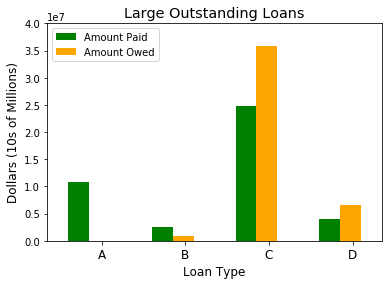

In [24]:
# Large Loans
fig_dims = (6, 4)
fig, axes = plt.subplots(figsize=fig_dims)

from matplotlib.ticker import FormatStrFormatter

loan_sub_grp.loc[True].plot.bar(rot=0,color=['g', 'orange']*5,ax=axes )

#axes.yaxis.set_major_formatter(FormatStrFormatter('%e'))

plt.xticks([r + barWidth for r in range(4)], ['A','B','C','D'],fontsize='large')
#plt.yticks(fontsize='large')
# Create legend & Show graphic

plt.xlabel('Loan Type',fontsize='large')
plt.ylabel('Dollars (10s of Millions)',fontsize='large')
plt.title('Large Outstanding Loans',fontsize='x-large')
#ytickformat('usd')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.ylim(0, 40000000)
plt.legend()
plt.show()

# Large Loans Are highly leveraged and more likely to fail

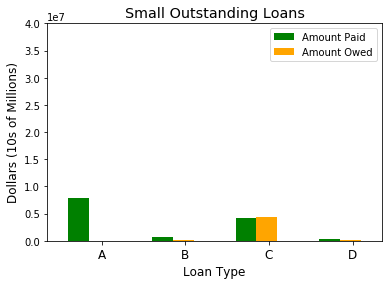

In [25]:
#Small Loans

fig_dims = (6, 4)
fig, axes = plt.subplots(figsize=fig_dims)

from matplotlib.ticker import FormatStrFormatter

loan_sub_grp.loc[False].plot.bar(rot=0,color=['g', 'orange']*5,ax=axes )

#axes.yaxis.set_major_formatter(FormatStrFormatter('%e'))

plt.xticks([r + barWidth for r in range(4)], ['A','B','C','D'],fontsize='large')
#plt.yticks(fontsize='large')
# Create legend & Show graphic

plt.xlabel('Loan Type',fontsize='large')
plt.ylabel('Dollars (10s of Millions)',fontsize='large')
plt.title('Small Outstanding Loans',fontsize='x-large')
#ytickformat('usd')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.ylim(0, 40000000)
plt.legend()
plt.show()

# Small Loans aren't as leveraged